In [2]:
%matplotlib inline
#import warnings; warnings.simplefilter('always')

In [8]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

from scipy import optimize
from scipy.optimize import curve_fit

import os
from functools import reduce
import scipy
from scipy.stats.stats import pearsonr
from scipy import stats
from scipy.stats import ks_2samp
from scipy.stats import entropy
from scipy.stats import norm
from scipy.stats import lognorm
from scipy.stats import nbinom
from scipy.stats import expon
from scipy.stats.mstats import gmean

from scipy import optimize
from scipy.optimize import curve_fit

import statsmodels.api as sm
lowess = sm.nonparametric.lowess
import math

from IPython.display import HTML
from IPython.display import Video


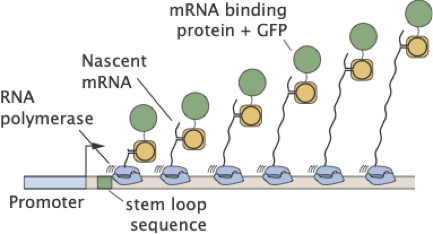

In [15]:
Video("2017-12-26-A140P_eve_30uW_550V_composite.mp4")

## Transcription occurs in bursts

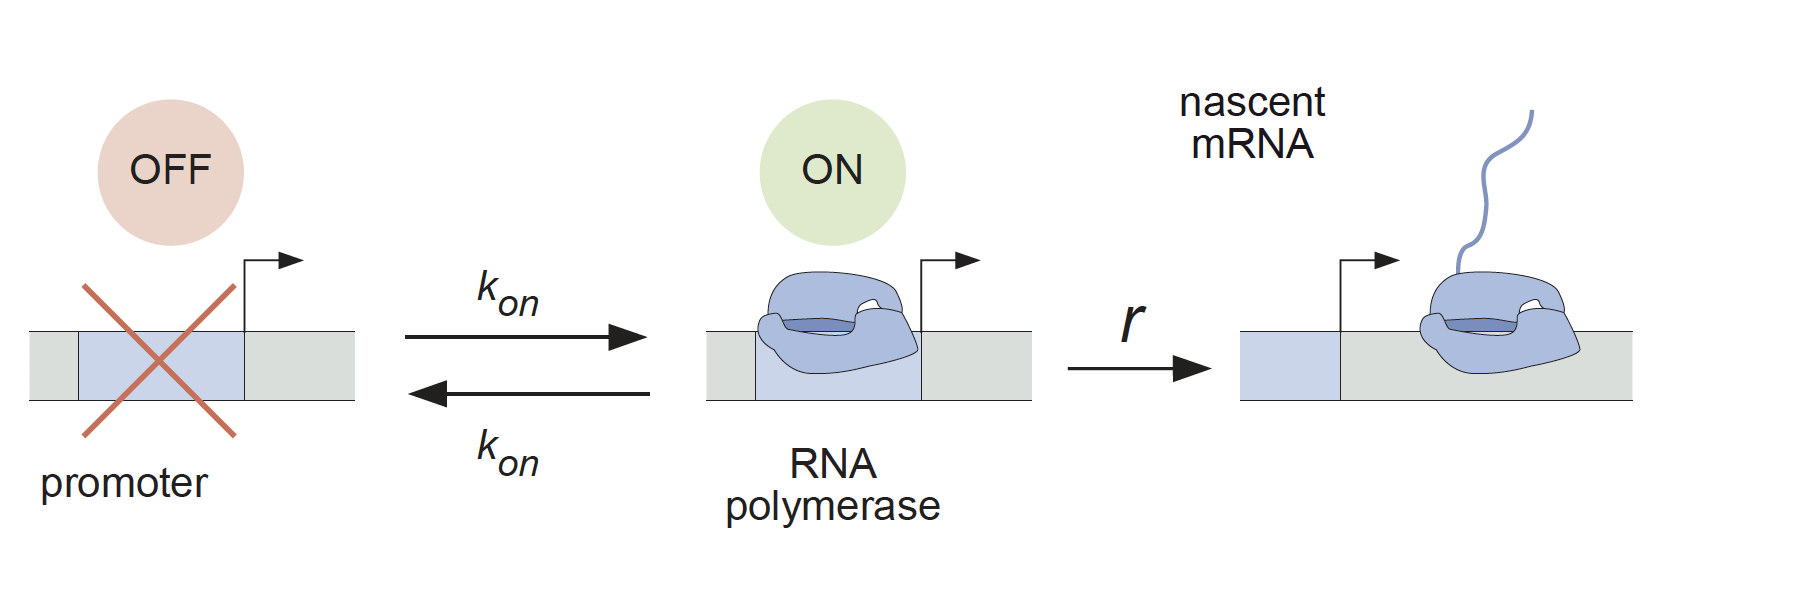

## Today we are going to develop a model of transcriptional bursting

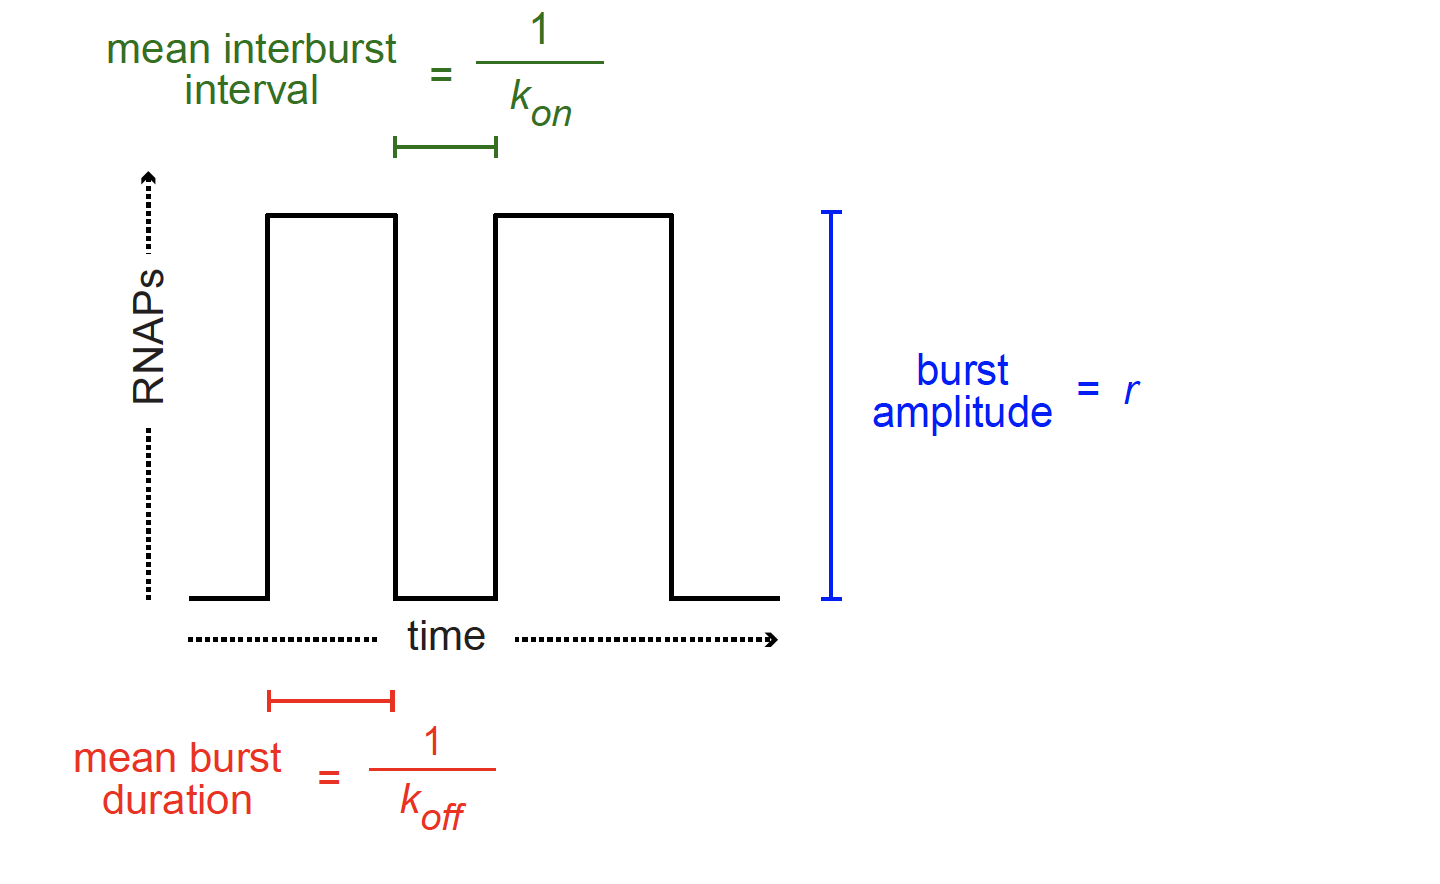

First, let's develop a little intuition about this kind of kinetics.  

We have a process that startd in an OFF state, and has a fixed probability of turning ON. This probability is usually expressed in terms of an "on rate" and written $k_{on}$.  

Let's say we start OFF and monitor its state every second, with the probability being .10 that it will turn on in any giving one second window, which we can express as = .1/sec, meaning we have a $k_{on}$ of .10/sec.

We can write a little simulation of this as follows:

In [25]:
# time interval

interval = 1

kon = .1

# do a large number of trials to see how long it takes to turn on

time_to_on = []

for trial in range(0,100000):
    time = 1
    
    while (np.random.rand() > kon):
        time += interval
        
    time_to_on.append(time)


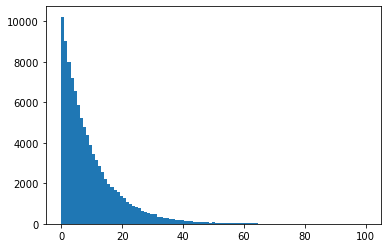

In [26]:
h = plt.hist(time_to_on,bins=np.linspace(0,100,100))

In [27]:
# time interval

interval = 1

kon = .05

# do a large number of trials to see how long it takes to turn on

time_to_on = []

for trial in range(0,100000):
    time = 1
    
    while (np.random.rand() > kon):
        time += interval
        
    time_to_on.append(time)


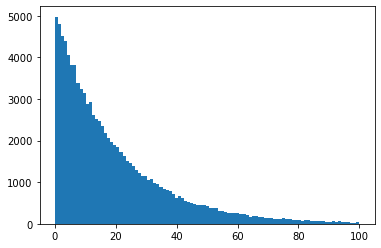

In [28]:
h = plt.hist(time_to_on,bins=np.linspace(0,100,100))

In [29]:
np.mean(time_to_on)

20.00125

In [31]:

interval = 1

for kon in [.01,.05,.1,.25]:

    time_to_on = []

    for trial in range(0,10000):
        time = 1
    
        while (np.random.rand() > kon):
            time += interval
        
        time_to_on.append(time)
    
    print (kon, "\t", np.mean(time_to_on))


0.01 	 99.6709
0.05 	 20.0502
0.1 	 10.0218
0.25 	 3.9439


So, now let's think about this mathematically. Let's say we have an entire population of genes in the OFF state, and that each one has a chance of switching to the ON state of $k_{on}$.  

$\huge {{dN_{\small OFF}\over{dt}}=-k_{\normalsize on}N_{\small OFF}}$

which is easily solved as  

$\huge {N_{\small OFF} = N_{0}}e^{-k_{on}t}$

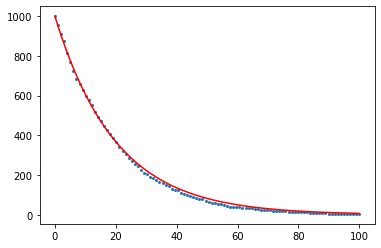

In [44]:
# time interval

interval = 1

kon = .05

# do a large number of trials to see how long it takes to turn on

number_left = np.zeros(100)

trials = 1000

for trial in range(0,trials):
    
    time = 0
    number_left[time] += 1
    
    for time in range(1,100):
        if np.random.rand() > kon:
            number_left[time] += 1
        else:
            break

            
t = np.linspace(0,100,100)
h = plt.scatter(t,number_left,s=4)
plt.plot(t,trials*np.exp(-kon*t),c='red')

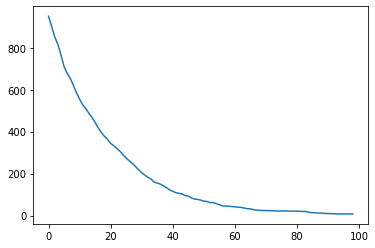

In [89]:
# can also sample random values from exponential 

# time interval

interval = 1

kon = .05

# do a large number of trials to see how long it takes to turn on

trials = 1000

on_intervals = expon.rvs(loc=0,scale=1/kon,size=trials)
h = np.histogram(on_intervals,bins=np.arange(0,100))
plt.plot(trials - np.cumsum(h[0]))


Let's consider two ways to simulate this process of a gene turning on and off. 

First, just create a discrete model where we go back and forth between state 0 (OFF) and state 1 (ON) with probabilities $k_{on}$ and $k_{off}$.  

<BarContainer object of 251 artists>

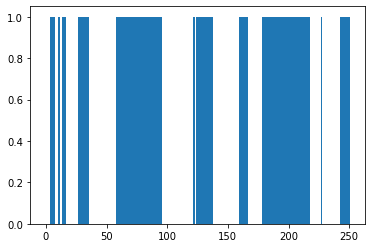

In [67]:
kon  = 1 / 10
koff = 1/ 20
total_time = 250

s = [0]

time = 0

while time < total_time:
    if s[-1] == 0:
        if np.random.rand() <= kon:
            s.append(1)
        else:
            s.append(0)
            
    else:
        if np.random.rand() <= koff:
            s.append(0)
        else:
            s.append(1)
            
    time += 1
    
plt.bar(np.arange(0,len(s)),s,1)

0 --> 1 13.164573999124169
1 --> 0 17.042509699985253
0 --> 1 25.426739369137955
1 --> 0 33.459648743090106
0 --> 1 41.223833607960245
1 --> 0 55.551521391484684
0 --> 1 66.20230600432015
1 --> 0 66.63857686372523
0 --> 1 103.60536501951123
1 --> 0 126.91660371540428
0 --> 1 134.77067460922598
1 --> 0 136.28548861413873
0 --> 1 137.66167849076388
1 --> 0 161.65563884723278
0 --> 1 166.18169729876277
1 --> 0 176.34641026680256
0 --> 1 177.45553633864557
1 --> 0 210.47714150919592
0 --> 1 213.95715391599828
1 --> 0 276.87004315097636


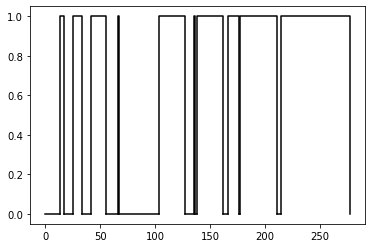

In [102]:
kon  = 1 / 10
koff = 1/ 20
total_time = 250

s = [0]

t = 0

promoter_state == 0
intervals = []

while t < total_time:
    
    if promoter_state == 0:
        off_interval = float(expon.rvs(loc=0,scale=1/kon,size=1))
        t_start = t
        t_end   = t + off_interval
        intervals.append([t_start,t_end,0])
        plt.plot(np.array([t_start,t_end]),np.array([0,0]),c='black')
        promoter_state = 1
        t = t_end
        print ("0 --> 1", t)
        
    else:
        on_interval = float(expon.rvs(loc=0,scale=1/koff,size=1))
        t_start = t
        t_end = t + on_interval
        intervals.append([t_start,t_end,1])

        plt.plot(np.array([t_start,t_start,t_end,t_end]),np.array([0,1,1,0]),c='black')
        plt.plot
        promoter_state = 0
        t = t_end
        print ("1 --> 0", t)


In [191]:
kon  = 1 / 10
koff = 1/ 20
total_time = 10000

s = [0]

t = 0

state_sequence = np.zeros(total_time + 1)
promoter_state == 0
intervals = []

while t < total_time:
    
    if promoter_state == 0:
        off_interval = float(expon.rvs(loc=0,scale=1/kon,size=1))
        t_start = t
        t_end   = t + off_interval

        intervals.append([t_start,t_end,0])
        promoter_state = 1
        t = t_end
        
    else:
        on_interval = float(expon.rvs(loc=0,scale=1/koff,size=1))
        t_start = t
        t_end = t + on_interval
        
        t_end   = min(t_end,total_time)
        
        tsm = math.modf(t_start)
        tem = math.modf(t_end)
        
        if tem[1] > tsm[1]:
            state_sequence[int(tsm[1])] += 1.0 - tsm[0]
            for i in range(int(t_start+1),int(t_end)):
                state_sequence[i] += 1
            state_sequence[int(tem[1])] += tem[0]
        else:
            state_sequence[int(tsm[1])] += t_end - t_start

            
        intervals.append([t_start,t_end,1])
        promoter_state = 0
        t = t_end
        
intervals = pd.DataFrame(data=intervals,columns=['Start','End','State'])


<BarContainer object of 750 artists>

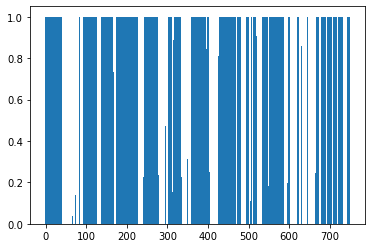

In [192]:
s = 0
e = 750

d = state_sequence[s:e]

plt.bar(np.arange(s,e),d,1)

## There's one more piece to the puzzle

When the gene is ON it is making RNA. RNA is made by RNA polymerase, which is a big molecule that gets loaded on at a fixed rate $r$ and then takes a roughly fixed amount of time to traverse the gene. Once loaded, polymerases continue on the gene for a roughly fixed duration $D$. We can approximate this by convolving our function with a pulse of width $D$ and height $r$ and the resulting function becomes a measure of the number of polymerases on the gene as a function of time.

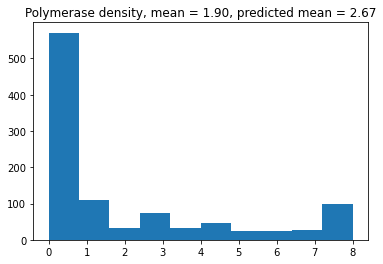

In [229]:
mean_on_time = 30
koff = 1 / mean_on_time

mean_off_time = 60
kon = 1 / mean_off_time

loading_rate = .2
signal_duration = 40

total_time = 1000

t = 0

state_sequence = np.zeros(total_time + 1)
promoter_state == 0
intervals = []

while t < total_time:
    
    if promoter_state == 0:
        off_interval = float(expon.rvs(loc=0,scale=1/kon,size=1))
        t_start = t
        t_end   = t + off_interval

        intervals.append([t_start,t_end,0])
        promoter_state = 1
        t = t_end
        
    else:
        on_interval = float(expon.rvs(loc=0,scale=1/koff,size=1))
        t_start = t
        t_end = t + on_interval
        t_end   = min(t_end,total_time)
        
        tsm = math.modf(t_start)
        tem = math.modf(t_end)
        
        if tem[1] > tsm[1]:
            state_sequence[int(tsm[1])] += 1.0 - tsm[0]
            for i in range(int(t_start+1),int(t_end)):
                state_sequence[i] += 1
            state_sequence[int(tem[1])] += tem[0]
        else:
            state_sequence[int(tsm[1])] += t_end - t_start

        intervals.append([t_start,t_end,1])
        promoter_state = 0
        t = t_end
        
intervals = pd.DataFrame(data=intervals,columns=['Start','End','State'])
polymerase_density = np.convolve(state_sequence,loading_rate * np.ones(signal_duration))

h = plt.hist(polymerase_density)

cycle_time = mean_on_time + mean_off_time
pred_mean_density = loading_rate * signal_duration * mean_on_time / cycle_time
t = plt.title("Polymerase density, mean = %.2f, predicted mean = %.2f" % (np.mean(polymerase_density),pred_mean_density))

<BarContainer object of 750 artists>

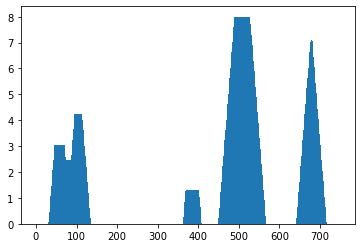

In [230]:
s = 0
e = 750

d = polymerase_density[s:e]

plt.bar(np.arange(s,e),d,1)

In [231]:
np.convolve(state_sequence,loading_rate * np.ones(signal_duration))

array([0. , 0. , 0. , ..., 0.4, 0.2, 0. ])

In [232]:
from scipy.signal import deconvolve

In [233]:
dc = deconvolve(polymerase_density,np.ones(signal_duration))

<BarContainer object of 750 artists>

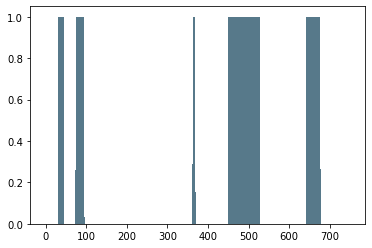

In [234]:
s = 0
e = 750

d = dc[0][s:e] / loading_rate
plt.bar(np.arange(s,e),d,1)

d = state_sequence[s:e]
plt.bar(np.arange(s,e),d,1,alpha=.25)

In [235]:
polymerase_density_noise = polymerase_density + norm.rvs(loc=0,scale=.5,size=len(polymerase_density))

<BarContainer object of 750 artists>

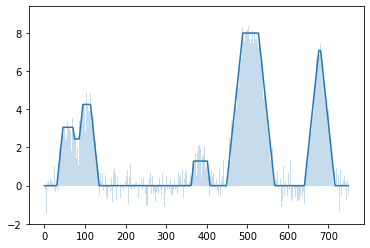

In [236]:
s = 0
e = 750

d = polymerase_density[s:e] 
plt.plot(np.arange(s,e),d,1)

d = polymerase_density_noise[s:e]
plt.bar(np.arange(s,e),d,1,alpha=.25)

In [237]:
dc = deconvolve(polymerase_density_noise,np.ones(signal_duration))

<BarContainer object of 750 artists>

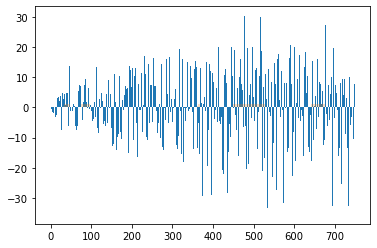

In [238]:
s = 0
e = 750

d = dc[0][s:e] / loading_rate
plt.bar(np.arange(s,e),d,1)

d = state_sequence[s:e]
plt.bar(np.arange(s,e),d,1,alpha=.25)

## What went wrong?

In [261]:
basis = np.zeros((len(polymerase_density_noise),len(polymerase_density_noise)))

for i in range(0,len(polymerase_density_noise)):
    np.put(basis[i],np.arange(i,min(i+signal_duration,len(polymerase_density_noise))),1)
    

In [271]:
polymerase_nnls = scipy.optimize.nnls(basis.T,polymerase_density/loading_rate)
polymerase_density_noise = polymerase_density + norm.rvs(loc=0,scale=.25,size=len(polymerase_density))
polymerase_noise_nnls = scipy.optimize.nnls(basis.T,polymerase_density_noise/loading_rate)

<BarContainer object of 750 artists>

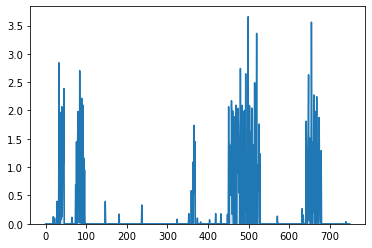

In [272]:
s = 0
e = 750

d = polymerase_noise_nnls[0][s:e]
plt.plot(np.arange(s,e),d,1)

d = state_sequence[s:e]
plt.bar(np.arange(s,e),d,1,alpha=.25)